In [ ]:
# AlexNet

In [ ]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
# You will need to load the images.
# Download the Chessman image dataset by Nitesh Yadav from Kaggle: 
# https://www.kaggle.com/niteshfre/chessman-image-dataset
# Either get the file from Kaggle API, manually upload the archive.zip file,
# Or mount Google Drive.

In [ ]:
#!unzip archive.zip

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
labelDictionary = {'Pawn': 0, 'Knight': 1, 'Bishop': 2, 'Rook': 3, 'Queen': 4, 'King': 5}
class_names = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen', 'King']

In [ ]:
# Change basepath, depending on how you uploaded your data.
basepath = "Chessman-image-dataset/Chess"

images=[]
labels=[]

# Loop through each folder in the directory
for folder in os.listdir(basepath):
  label = folder
  # Loop through each file in the directory
  for file in os.listdir(basepath+ "/" + folder):
    if 'jpg' in file:
      new_img = cv2.resize(cv2.imread(basepath+ "//" + folder + "//" + file, cv2.IMREAD_GRAYSCALE), (227,227))
      images.append(new_img)
      labels.append(labelDictionary[label])

images = np.array(images)
labels = np.array(labels)

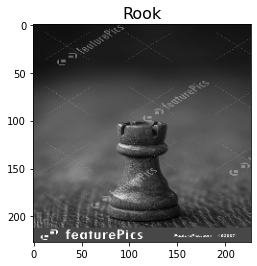

In [ ]:
# Display one of the image.
plt.imshow(images[21], cmap="gray")
plt.title(class_names[labels[21]], fontsize = 16)
plt.show()

In [ ]:
# Reshape the images for grayscale
images = images.reshape((images.shape[0], 227, 227, 1))

In [ ]:
# Shuffle our data
images, labels = shuffle(images, labels)

In [ ]:
# Split the dataset into 60% training, 20% validation, and 20% testing set
x_train, x_remainder, y_train, y_remainder = train_test_split(images, labels, train_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5)

In [ ]:
# Scale data
x_train = x_train/255.
x_valid = x_valid/255.
x_test = x_test/255.

In [ ]:
# Implement the AlexNet Model

model = Sequential()

model.add(Conv2D(filters=96, input_shape=(227, 227, 1), kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        11712     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                        

In [ ]:
# Compile and train the model
model.compile(Adam(1e-4), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_test = model.fit(x_train, y_train, epochs=25, validation_data=(x_valid,y_valid))

Epoch 1/25
9/9 [==============================] - 4s 136ms/step - loss: 2.3500 - accuracy: 0.1290 - val_loss: 1.7934 - val_accuracy: 0.1720
Epoch 2/25
9/9 [==============================] - 0s 34ms/step - loss: 1.9810 - accuracy: 0.2007 - val_loss: 1.7885 - val_accuracy: 0.2043
Epoch 3/25
9/9 [==============================] - 0s 32ms/step - loss: 1.8233 - accuracy: 0.2079 - val_loss: 1.7894 - val_accuracy: 0.2043
Epoch 4/25
9/9 [==============================] - 0s 33ms/step - loss: 1.7860 - accuracy: 0.2151 - val_loss: 1.7897 - val_accuracy: 0.2043
Epoch 5/25
9/9 [==============================] - 0s 32ms/step - loss: 1.7294 - accuracy: 0.2581 - val_loss: 1.7851 - val_accuracy: 0.2043
Epoch 6/25
9/9 [==============================] - 0s 32ms/step - loss: 1.7459 - accuracy: 0.2258 - val_loss: 1.7854 - val_accuracy: 0.2043
Epoch 7/25
9/9 [==============================] - 0s 32ms/step - loss: 1.7607 - accuracy: 0.2616 - val_loss: 1.7884 - val_accuracy: 0.2151
Epoch 8/25
9/9 [==========

In [ ]:
# Find the total loss and accuracy of the testing set
score = model.evaluate(x_test , y_test)
print("Total loss on Testing Set: ", score[0])
print("Accuracy of Testing Set: ", score[1])
result = model.predict(x_test)

3/3 [==============================] - 0s 9ms/step - loss: 2.0295 - accuracy: 0.2366
Total loss on Testing Set:  2.0294744968414307
Accuracy of Testing Set:  0.23655913770198822


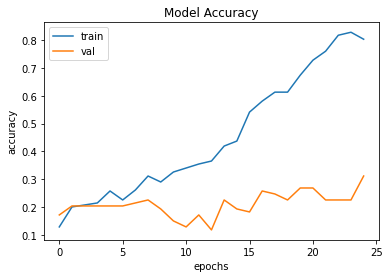

In [ ]:
# Plot Model Accuracy
plt.plot(model_test.history['accuracy'], label='train')
plt.plot(model_test.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

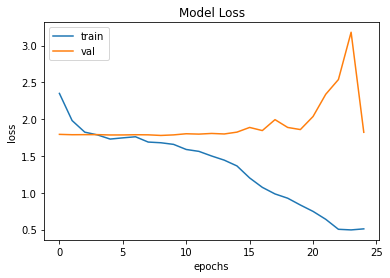

In [ ]:
# Plot Model Loss
plt.plot(model_test.history['loss'], label = 'train')
plt.plot(model_test.history['val_loss'], label='val')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
# Get the indices. Then, print out weighted precision, recall, and F1 scores
formatted_results = []
for i in range(len(result)):
  formatted_results.append(np.argmax(result[i]))

print("Weighted Precision Score: " + str(precision_score(y_test, formatted_results, average='weighted')))
print("Weighted Recall Score: " + str(recall_score(y_test, formatted_results, average='weighted')))
print("Weighted F1 Score: " + str(f1_score(y_test, formatted_results, average='weighted')))

Weighted Precision Score: 0.23295965835430488
Weighted Recall Score: 0.23655913978494625
Weighted F1 Score: 0.1397449650446128


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


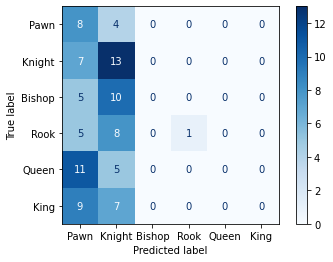

In [ ]:
# Plot and display confusion matrix
cm = confusion_matrix(y_test, formatted_results)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cmDisplay.plot(cmap='Blues')
plt.show()

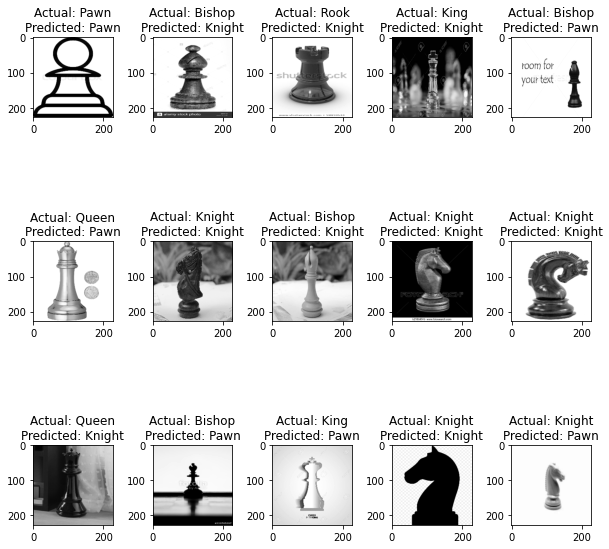

In [ ]:
# Display actual and predicted data of a few data from testing set
n_rows = 3
n_cols = 5
index = 0;
plt.figure(figsize=(10, 10))
for row in range(n_rows):
    for col in range(n_cols):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_test[index].squeeze(), cmap="gray")
        plt.title("Actual: " + str(class_names[y_test[index]]) + "\nPredicted: " + str(class_names[np.argmax(result[index])]), fontsize=12)
        index += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()